<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [3]:
##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')

In [4]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [5]:
##### Your Code Here #####

# not using spacy
import re
def tokenize(x):
    text = x.lower()
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    return text.split()

df['tokens'] = df['description'].apply(lambda x: tokenize(x))
df['tokens'][0][:20]

['bdivdivjob',
 'requirementsdivullipnconceptual',
 'understanding',
 'in',
 'machine',
 'learning',
 'models',
 'like',
 'naixc2xa8ve',
 'bayes',
 'kmeans',
 'svm',
 'apriori',
 'linear',
 'logistic',
 'regression',
 'neural',
 'random',
 'forests',
 'decision']

In [35]:
# python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union('and','or','of','to','a','for','with','be','in','you','we','on','our',' ','<>')

def spacy_lemmatize(x):
    doc = nlp.tokenizer(x)
    return [token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS]

df['lemmas'] = df['tokens'].apply(lambda x: spacy_lemmatize(' '.join(x)))

In [42]:
#nlp.tokenizer(str(df.tokens))

0      [bdivdivjob, requirementsdivullipnconceptual, ...
1      [bdivjob, descriptionbrnbrnpas, a, data, scien...
2      [bdivpas, a, data, scientist, you, will, be, w...
3      [bdiv, classjobsearchjobmetadataheader, icluxs...
4      [bullilocation, usa, xe2x80x93, multiple, loca...
5      [bdivcreate, various, business, intelligence, ...
6      [bdivpas, spotify, premium, swells, to, over, ...
7      [beverytown, for, gun, safety, the, nations, l...
8      [bullims, in, a, quantitative, discipline, suc...
9      [bdivpslack, is, hiring, experienced, data, sc...
10     [bdivpbwho, we, arebppnblackthorn, therapeutic...
11     [bdiv, classjobsearchjobmetadataheader, icluxs...
12     [bnfosysxe2x80x93, data, amp, analytics, xe2x8...
13     [bdivpas, spotify, premium, swells, to, over, ...
14     [bdivulliexperience, with, guiding, rampd, str...
15     [bdivpthe, atlantic, is, seeking, a, data, sci...
16     [bdivpbthe, challengebppneventbrite, is, big, ...
17     [bdiv, classjobsearchjob

In [36]:
df['lemmas'][0][:5]

['bdivdivjob',
 'requirementsdivullipnconceptual',
 'understand',
 'machine',
 'learn']

In [8]:
df['lemmas'].head()

0    [bdivdivjob, requirementsdivullipnconceptual, ...
1    [bdivjob, descriptionbrnbrnpas, datum, scienti...
2    [bdivpas, datum, scientist, work, consult, bus...
3    [bdiv, classjobsearchjobmetadataheader, icluxs...
4    [bullilocation, usa, xe2x80x93, multiple, loca...
Name: lemmas, dtype: object

In [9]:
df['lemmas'].head()

0    [bdivdivjob, requirementsdivullipnconceptual, ...
1    [bdivjob, descriptionbrnbrnpas, datum, scienti...
2    [bdivpas, datum, scientist, work, consult, bus...
3    [bdiv, classjobsearchjobmetadataheader, icluxs...
4    [bullilocation, usa, xe2x80x93, multiple, loca...
Name: lemmas, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [10]:
df.lemmas.head()

0    [bdivdivjob, requirementsdivullipnconceptual, ...
1    [bdivjob, descriptionbrnbrnpas, datum, scienti...
2    [bdivpas, datum, scientist, work, consult, bus...
3    [bdiv, classjobsearchjobmetadataheader, icluxs...
4    [bullilocation, usa, xe2x80x93, multiple, loca...
Name: lemmas, dtype: object

In [11]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer
from spacy.tokenizer import Tokenizer

vect = CountVectorizer(stop_words=STOP_WORDS)

vect.fit(df['description'])
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
dtm.head(10)

,00,000,02115,03,0356,04,057,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [13]:
from collections import Counter
word_counts = Counter()

In [14]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
counts = count(df['lemmas'])
counts_top20 = counts[counts['rank'] <= 20]

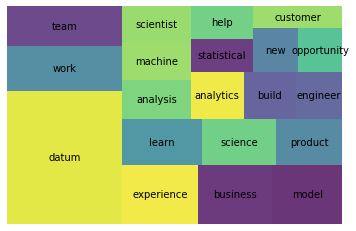

In [16]:
import squarify
squarify.plot(sizes=counts_top20['pct_total'], label=counts_top20['word'], alpha=.8)

plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [17]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['description'])

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,000,03,04,06366,10,100,1000,1001,105,1079302,...,york,young,yrs,zenreach,zero,zeus,zf,zillow,zogsports,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [18]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [19]:
# Query Using kneighbors 
nn.kneighbors(dtm.todense()[0])

# bottom array represents locations of documents with similar content

(array([[0.        , 0.87365974, 0.88951925, 0.89836889, 0.90382974]]),
 array([[  0, 276, 301, 264,  71]]))

In [20]:
df['description'].iloc[276][:300]

'b"<div><div><div>Facebook\'s mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we\'re building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to'

In [21]:
ideal_job = ["""We are all about the comfort of our employes,
as based on Maslow's theory. We conduct research for clients on
a great range of projects. Working here, you will have the opportunity
to develop and apply your data science skills on a variety of topics. 
Become a specialist in the domain you choose. Switch when you want 
something new. This is the freedom we promise you at org...
"""]

In [22]:
new = tfidf.transform(ideal_job)
nn.kneighbors(new.todense())

(array([[1.33146559, 1.33527733, 1.33670367, 1.34981474, 1.35549483]]),
 array([[135,  25, 405, 403,  14]]))

In [23]:
df['description'].iloc[14][:2000]

"b'<div><ul><li>Experience with guiding R&amp;D strategy for your organization</li><li>Outstanding written and verbal communication skills</li><li>Proficiency in statistical computing (R, Python, Matlab, SAS)</li><li>2+ years of applying algorithm design/multivariate statistics/machine learning to solving real-world problems</li><li>MS in a quantitative research discipline (e.g., Statistics, Machine Learning, Economics, Applied Math, Operations Research), or 5+ years of applied experience in lieu of degree</li><li>Ability to work independently and as part of a diverse, cross-functional team</li></ul></div>\\n<br/>\\n<div>Amazon aims to exceed the expectations of our customers by ensuring that their orders, no matter how large or small, are delivered as quickly, accurately, and cost effectively as possible. To meet this goal, Amazon has invested in Amazon Logistics, a world class last mile operation. We are looking for a dynamic, resourceful, and organized Data Scientist within Amazon L

So what companies do we have here? 

1) Paradigm Inc.
2) Ads Measurement (of Partners of Pinterest)
3) Clarkston Consulting
4) 1904Labs
5) Amazon [Logistics]

In [24]:
# Process a text using Spacy's word-to-vec 
doc = nlp(df['description'][0])

doc_vector = doc.vector
print(doc_vector)

[-6.82669580e-02  1.30686238e-01 -9.27567407e-02  1.86644569e-02
  9.05009136e-02  1.23302259e-01  3.53182293e-02 -6.30395263e-02
 -1.15252286e-03  1.43324709e+00 -1.90940335e-01 -2.35368554e-02
  7.46296346e-02 -3.27828526e-02 -1.07050240e-01  1.08650448e-02
 -4.92214821e-02  1.17113698e+00 -1.55671969e-01 -1.86079610e-02
  1.75716984e-03  5.40204421e-02 -1.21214263e-01 -8.14812109e-02
  2.96540707e-02 -1.92577695e-03  6.00637384e-02  6.66015781e-03
  1.76010266e-01 -9.42165703e-02 -4.15372327e-02  1.56595558e-02
  2.69883089e-02  3.02586164e-02  9.35147926e-02 -4.50735651e-02
  1.30048199e-02  7.07333237e-02 -6.47911876e-02 -4.00465503e-02
 -2.86844932e-02  2.55251322e-02 -4.71204966e-02  3.50463577e-02
 -6.61097616e-02  7.57142380e-02 -3.31030264e-02  3.94859537e-02
  9.01501253e-02 -3.65183353e-02  1.51329930e-03  3.12870331e-02
 -2.63166763e-02 -9.77174100e-03 -8.69368687e-02  5.30527048e-02
 -3.19176577e-02 -8.12683627e-02 -9.23807826e-03 -4.20991071e-02
 -2.31068563e-02 -3.14946

In [25]:
len(doc_vector)

300

In [26]:
# similarity of two docs example
doc1 = nlp(df['description'][1])
doc2 = nlp(df['description'][2])

similarity = doc1.similarity(doc2)
print(similarity)

0.9754150453847172


In [27]:
# PCA example 
from sklearn.decomposition import PCA
def get_word_vectors(words):
    return [nlp(word).vector for word in words]

words = df['lemmas'][0]

# n_components specifies number of dimensions to project onto
pca = PCA(n_components = 2)

pca.fit(get_word_vectors(words))

word_vecs_2d = pca.transform(get_word_vectors(words))

word_vecs_2d

array([[ 5.85268027e-01, -1.65239229e+00],
       [ 5.85268027e-01, -1.65239229e+00],
       [-2.15470081e+00,  6.38438739e-01],
       [-1.32181274e+00,  1.04173309e+00],
       [-2.26763952e+00,  2.83568912e-01],
       [-1.43435896e+00,  1.55141238e+00],
       [-1.81787962e+00,  3.37268707e-03],
       [ 5.85268027e-01, -1.65239229e+00],
       [ 3.64324104e+00, -4.46522159e-01],
       [ 5.85268027e-01, -1.65239229e+00],
       [ 4.81472553e+00, -1.03638486e-01],
       [ 3.31497080e+00, -1.28531946e+00],
       [ 2.60973715e-01,  2.17808263e+00],
       [ 1.04370278e+00,  1.60188985e+00],
       [ 1.29001106e+00,  2.98812376e+00],
       [ 6.10112078e-03,  1.89922956e+00],
       [-6.99507073e-01,  1.06114922e+00],
       [-1.18728484e+00, -4.29322564e-01],
       [-1.89419145e+00,  2.59476420e-02],
       [-5.01186962e-01,  9.45924244e-01],
       [ 3.26904526e+00, -2.07426748e+00],
       [ 1.81564520e+00, -2.16231808e+00],
       [-2.98927347e+00,  3.39528852e-01],
       [-1.

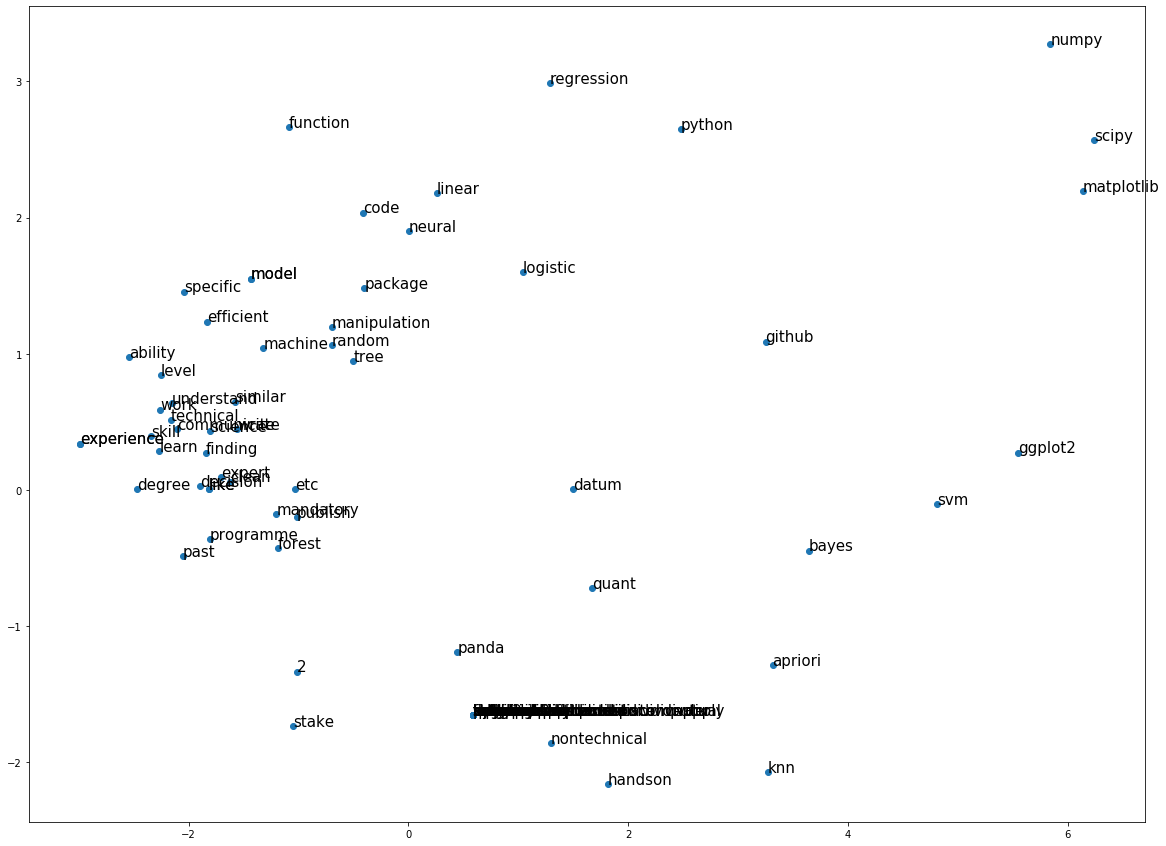

In [28]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [29]:
# Extract Document Vectors
X = [nlp(str(d)).vector for d in df['description']]

In [30]:
X[0]

array([-6.82669580e-02,  1.30686238e-01, -9.27567407e-02,  1.86644569e-02,
        9.05009136e-02,  1.23302259e-01,  3.53182293e-02, -6.30395263e-02,
       -1.15252286e-03,  1.43324709e+00, -1.90940335e-01, -2.35368554e-02,
        7.46296346e-02, -3.27828526e-02, -1.07050240e-01,  1.08650448e-02,
       -4.92214821e-02,  1.17113698e+00, -1.55671969e-01, -1.86079610e-02,
        1.75716984e-03,  5.40204421e-02, -1.21214263e-01, -8.14812109e-02,
        2.96540707e-02, -1.92577695e-03,  6.00637384e-02,  6.66015781e-03,
        1.76010266e-01, -9.42165703e-02, -4.15372327e-02,  1.56595558e-02,
        2.69883089e-02,  3.02586164e-02,  9.35147926e-02, -4.50735651e-02,
        1.30048199e-02,  7.07333237e-02, -6.47911876e-02, -4.00465503e-02,
       -2.86844932e-02,  2.55251322e-02, -4.71204966e-02,  3.50463577e-02,
       -6.61097616e-02,  7.57142380e-02, -3.31030264e-02,  3.94859537e-02,
        9.01501253e-02, -3.65183353e-02,  1.51329930e-03,  3.12870331e-02,
       -2.63166763e-02, -

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 